In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from PIL import Image

In [2]:
# Define locations
faces_dir = "faces"
smile_list_path = "SMILE_list.txt"
non_smile_list_path = "NON-SMILE_list.txt"

# Remove .jpg from smile and non-smile lists

with open(smile_list_path, 'r') as f:
    smile_list = [line.strip().replace('.jpg', '') for line in f.readlines()]

with open(non_smile_list_path, 'r') as f:
    non_smile_list = [line.strip().replace('.jpg', '') for line in f.readlines()]

# Images and labels
images = []
labels = []

for filename in os.listdir(faces_dir):
    if filename.endswith(".ppm"):
        img_path = os.path.join(faces_dir, filename)
        img_name = os.path.splitext(filename)[0]
        
        # Assign label
        label = 1 if img_name in smile_list else 0 if img_name in non_smile_list else None
        if label is not None:
            # Load and preproccess image
            img = Image.open(img_path).resize((64, 64))  # Resize
            img_array = np.array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)

# Convert to a numpy arrays
images = np.array(images)
labels = to_categorical(np.array(labels), num_classes=2)  # One-hot encoding

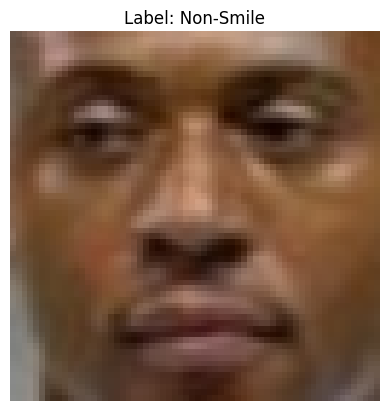

In [3]:
import matplotlib.pyplot as plt
n = 20
# Visualize an image and its label
plt.imshow(images[n])
plt.title(f"Label: {'Smile' if np.argmax(labels[n]) == 1 else 'Non-Smile'}")
plt.axis('off')
plt.show()


In [4]:
# shuffle
images, labels = shuffle(images, labels, random_state=1234)

# train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1234)


In [5]:
# Sequential API model
model = Sequential([
    Input((64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Fit
history = model.fit(x_train, y_train, validation_split = 0.15, epochs=10, batch_size=32, verbose = 1)

# Save
model.save("cnn.keras")

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5797 - loss: 0.6739 - val_accuracy: 0.7586 - val_loss: 0.4946
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8944 - loss: 0.3307 - val_accuracy: 0.9172 - val_loss: 0.2052
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9508 - loss: 0.1428 - val_accuracy: 0.9241 - val_loss: 0.1972
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9456 - loss: 0.1523 - val_accuracy: 0.8966 - val_loss: 0.2245
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9459 - loss: 0.1512 - val_accuracy: 0.9241 - val_loss: 0.2442
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9558 - loss: 0.1375 - val_accuracy: 0.9172 - val_loss: 0.1924
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9563 - loss: 0.1022 - val_accuracy: 0.9586 - val_loss: 0.1188
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9809 - loss: 0.0577 - val_accuracy: 0.9172 - v

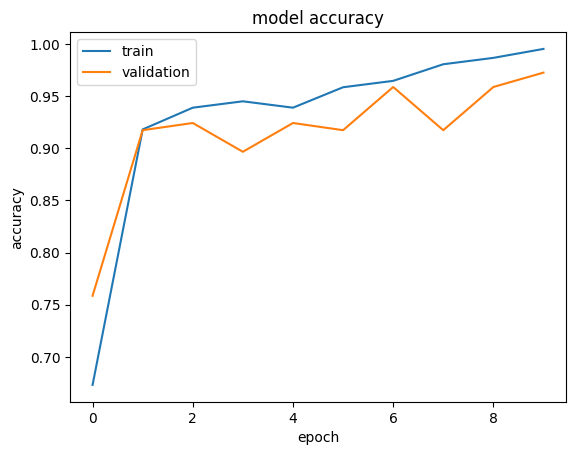

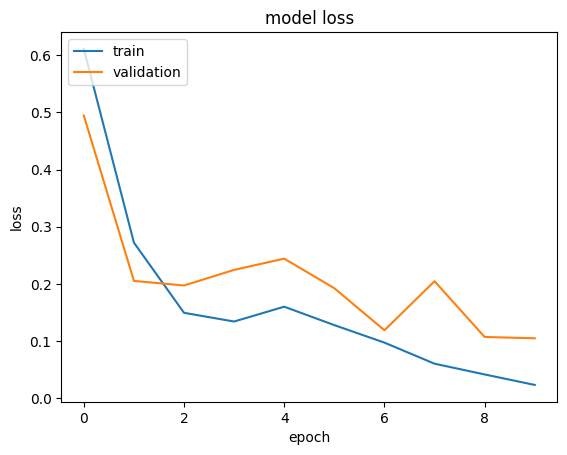

In [7]:
# plot history

import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# print model accuracy on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9595 - loss: 0.1490
Test accuracy: 0.9460580945014954


In [9]:
predictions = model.predict(x_test)
# Print the first 5 predictions.
predictions[0:5]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[2.0108391e-04, 9.9979895e-01],
       [9.9915099e-01, 8.4900041e-04],
       [4.7657415e-03, 9.9523431e-01],
       [1.9490799e-05, 9.9998045e-01],
       [9.9672699e-01, 3.2730368e-03]], dtype=float32)

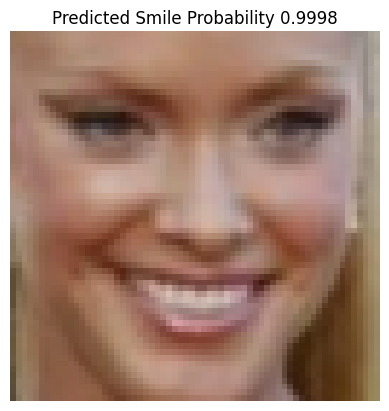

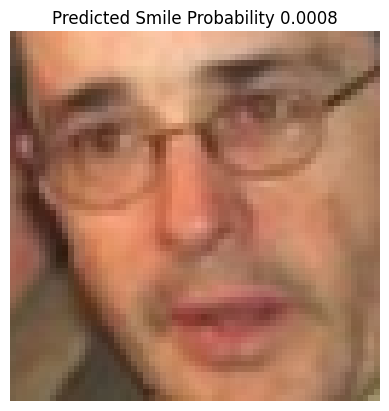

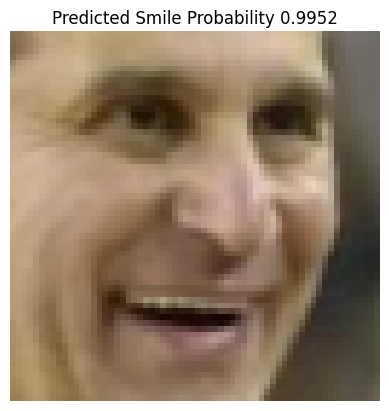

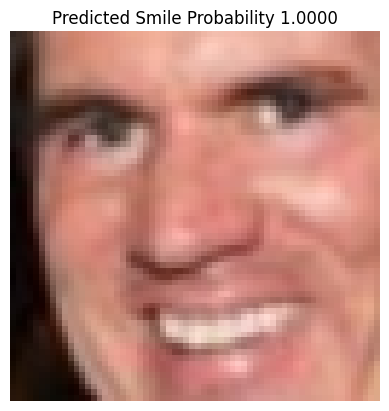

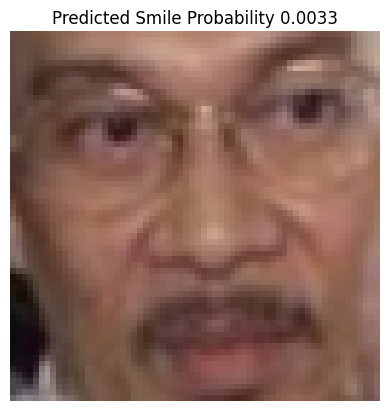

In [10]:
# Print first n faces and their smile probability
n = 5

for i in range(n):
    # Visualizar una imagen y su etiqueta
    plt.imshow(x_test[i])
    plt.title(f"Predicted Smile Probability {predictions[i][1]:.4f}")
    plt.axis('off')
    plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


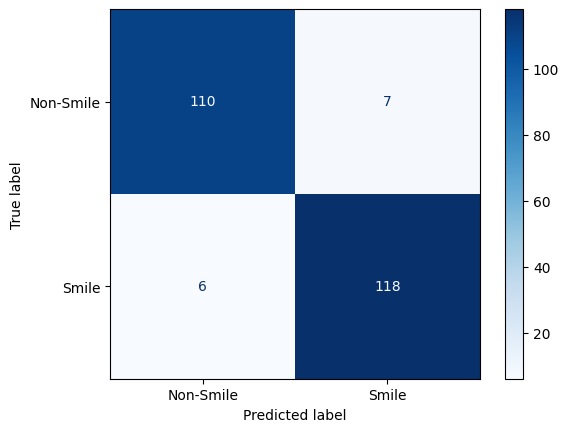

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Obtener las predicciones del modelo
y_pred_prob = model.predict(x_test)  # Predicciones (probabilidades)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir a etiquetas (0 o 1)

# Convertir etiquetas reales de one-hot a enteros
y_true = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Smile", "Smile"])
disp.plot(cmap="Blues")
